语料加载完毕，共 1600 个句子。

Word2Vec 模型训练完成。

与 'apple' 最相似的词:
  - orange: 0.9671
  - i: 0.9332
  - and: 0.8999

与 'learning' 最相似的词:
  - neural: 0.8737
  - intelligence: 0.8729
  - networks: 0.8681

与 'king' 最相似的词:
  - prince: 0.9731
  - princess: 0.9717
  - queen: 0.9631

开始生成可视化...

可视化图片已保存为 'w2v_visualization.png'


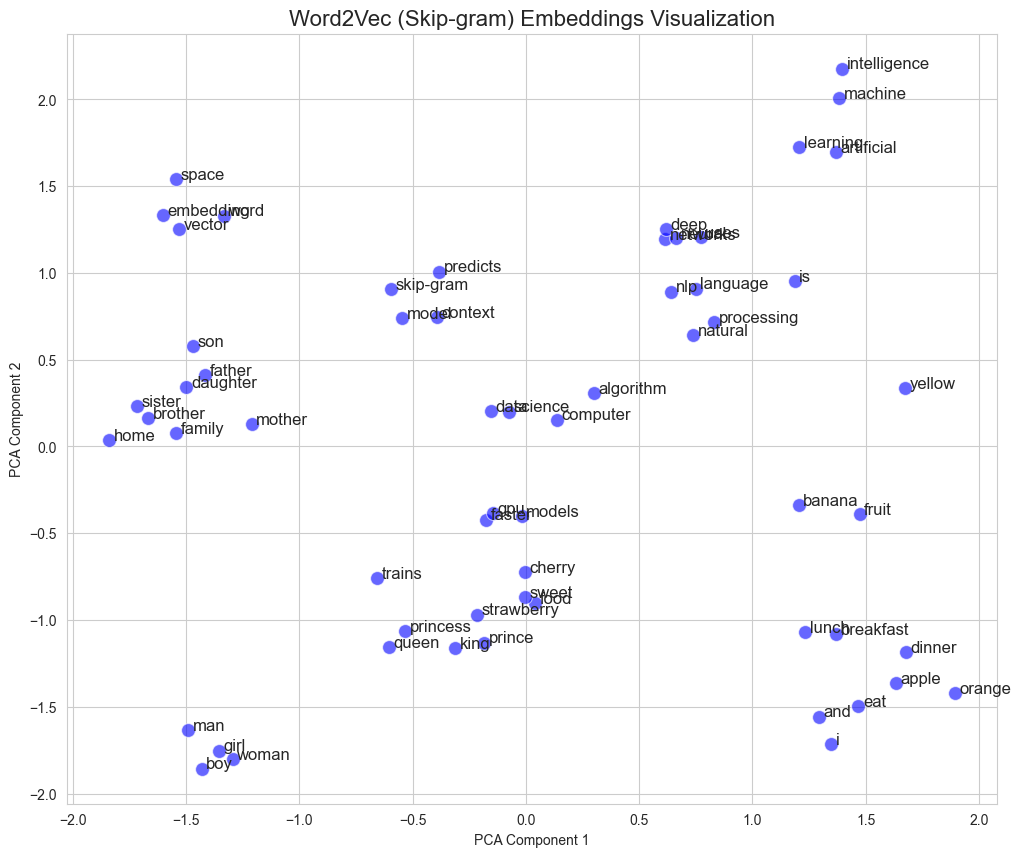

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

# ==========================================
# 1. 准备数据 (模拟语料)
# ==========================================
# 为了演示效果，我们手动构造一些有明显语义聚类的句子
# 分为三类：AI技术、水果、家庭关系
corpus = [
    # AI / NLP 相关
    ['machine', 'learning', 'is', 'artificial', 'intelligence'],
    ['deep', 'learning', 'uses', 'neural', 'networks'],
    ['natural', 'language', 'processing', 'is', 'nlp'],
    ['word', 'embedding', 'vector', 'space'],
    ['skip-gram', 'model', 'predicts', 'context'],
    ['algorithm', 'data', 'science', 'computer'],
    ['gpu', 'trains', 'models', 'faster'],
    
    # 水果/食物 相关
    ['apple', 'banana', 'orange', 'fruit'],
    ['i', 'eat', 'apple', 'and', 'orange'],
    ['banana', 'is', 'yellow', 'fruit'],
    ['cherry', 'strawberry', 'sweet', 'food'],
    ['lunch', 'dinner', 'breakfast', 'eat'],
    
    # 家庭/人称 相关
    ['king', 'queen', 'prince', 'princess'],
    ['father', 'mother', 'son', 'daughter'],
    ['man', 'woman', 'boy', 'girl'],
    ['brother', 'sister', 'family', 'home']
]

# 增加数据量以强化共现关系 (简单复制)
training_data = corpus * 100

print(f"语料加载完毕，共 {len(training_data)} 个句子。")

# ==========================================
# 2. 训练 Word2Vec (Skip-gram)
# ==========================================
# 参数解析：
# vector_size: 词向量维度 (通常 100-300，演示用 10)
# window: 上下文窗口大小
# min_count: 忽略出现次数过少的词
# sg: 1 表示 Skip-gram (默认0是CBOW) -> 今天的重点
# negative: 负采样个数 (通常 5-20) -> 今天的重点
# epochs: 迭代次数
model = Word2Vec(sentences=training_data, 
                 vector_size=10, 
                 window=3, 
                 min_count=1, 
                 sg=1,  # <--- 重点：开启 Skip-gram
                 negative=5, # <--- 重点：负采样
                 epochs=50,
                 seed=42)

print("\nWord2Vec 模型训练完成。")

# ==========================================
# 3. 验证训练结果
# ==========================================
def check_similarity(word):
    try:
        sims = model.wv.most_similar(word, topn=3)
        print(f"\n与 '{word}' 最相似的词:")
        for w, s in sims:
            print(f"  - {w}: {s:.4f}")
    except KeyError:
        print(f"'{word}' 不在词表中。")

check_similarity('apple')
check_similarity('learning')
check_similarity('king')

# ==========================================
# 4. 可视化 (PCA 降维)
# ==========================================
def plot_embeddings(model):
    # 获取所有词向量
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]
    
    # 使用 PCA 将 10维 降到 2维 以便绘图
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)
    
    # 创建 DataFrame 方便绘图
    df = pd.DataFrame(result, columns=['x', 'y'])
    df['word'] = words
    
    # 绘图设置
    plt.figure(figsize=(12, 10))
    sns.set_style("whitegrid")
    
    # 绘制散点
    sns.scatterplot(data=df, x='x', y='y', s=100, color='blue', alpha=0.6)
    
    # 添加标签
    for i, line in df.iterrows():
        plt.text(line['x']+0.02, line['y'], line['word'], fontsize=12)
        
    plt.title('Word2Vec (Skip-gram) Embeddings Visualization', fontsize=16)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    
    # 保存并显示
    plt.savefig('w2v_visualization.png')
    print("\n可视化图片已保存为 'w2v_visualization.png'")
    plt.show()

print("\n开始生成可视化...")
plot_embeddings(model)
